In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import random
import warnings

In [2]:
data=pd.read_csv("England dataset.csv")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,29,21,17,6,1,16986,17662,16263.54167,17919
1,29,21,18,6,1,18084,19097,16256.83333,18936
2,28,21,19,6,1,17798,18973,16242.83333,18637
3,28,20,20,6,1,17269,18556,16220.50000,18020
4,27,20,21,6,1,16658,17956,16196.79167,17387


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaler=MinMaxScaler()

In [5]:
data[["col 0"]] = scaler.fit_transform(data[["Unnamed: 0"]])
data[["col 1"]] = scaler.fit_transform(data[["Unnamed: 1"]])
data[["col 2"]] = scaler.fit_transform(data[["Unnamed: 2"]])
data[["col 3"]] = scaler.fit_transform(data[["Unnamed: 3"]])
data[["col 4"]] = scaler.fit_transform(data[["Unnamed: 4"]])
data[["col 5"]] = scaler.fit_transform(data[["Unnamed: 5"]])
data[["col 6"]] = scaler.fit_transform(data[["Unnamed: 6"]])
data[["col 7"]] = scaler.fit_transform(data[["Unnamed: 7"]])
data[["col 8"]] = scaler.fit_transform(data[["Unnamed: 8"]])
data=data.drop(columns=["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"])

In [6]:
data.head()

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8
0,0.326087,0.361446,0.695652,0.833333,1.0,0.494770,0.536862,0.534505,0.552864
1,0.326087,0.361446,0.739130,0.833333,1.0,0.563138,0.626214,0.533760,0.616189
2,0.315217,0.361446,0.782609,0.833333,1.0,0.545330,0.618493,0.532205,0.597572
3,0.315217,0.349398,0.826087,0.833333,1.0,0.512391,0.592528,0.529725,0.559153
4,0.304348,0.349398,0.869565,0.833333,1.0,0.474346,0.555168,0.527092,0.519738


In [7]:
inputs=data.iloc[:,0:8]
output=data.iloc[:,8]

In [8]:
inputs.head()

,col 0,col 1,col 2,col 3,col 4,col 5,col 6,col 7
0,0.326087,0.361446,0.695652,0.833333,1.0,0.494770,0.536862,0.534505
1,0.326087,0.361446,0.739130,0.833333,1.0,0.563138,0.626214,0.533760
2,0.315217,0.361446,0.782609,0.833333,1.0,0.545330,0.618493,0.532205
3,0.315217,0.349398,0.826087,0.833333,1.0,0.512391,0.592528,0.529725
4,0.304348,0.349398,0.869565,0.833333,1.0,0.474346,0.555168,0.527092


In [9]:
print(inputs.shape)
output.shape

(8720, 8)


(8720,)

In [10]:
def TLBO(X_train,X_test,y_train,y_test,pop_len=10,num=200):
    lb=0.01
    ub=10
    dim=2
    pos=np.dot(np.random.rand(pop_len,2),(ub-lb))+lb
    print("first position : ")
    print(pos)
    convergence_curve=[]
    iterations=[]
    pBestScore = np.zeros(pop_len)
    gBestScore=float("inf")
    gBest = np.zeros(dim)

    for l in range(0,num+1):
        
        teach=float("inf")
        temp=-1
        sum1=np.sum(pos,axis=0)
        diff_mean=[]
        for i in range(0,(pos.shape[0])):
            
            
            rbf_svr = svm.SVR(kernel = 'rbf', C = pos[i][0], gamma = pos[i][1]).fit(X_train, y_train)
            y_pred = rbf_svr.predict(X_train)
            msse = mean_squared_error(y_train, y_pred)
            fitness=msse
            
            pBestScore[i]=fitness
            
            if fitness<teach:
                teach=fitness
                temp=i
            if gBestScore > fitness:
                gBestScore = fitness
                for j in range(0,(pos.shape[1])):
                    gBest[j]=pos[i,j]
            
        r=random.random()
        rand=random.random()
        t=round((1+rand))
        for i in range(0,(pos.shape[1])):
            sum1[i]=sum1[i]-pos[temp][i]
        avg=[u/(pop_len-1) for u in sum1]
        for k in range(0,(pos.shape[1])):
            key=r*(pos[temp][k]-t*avg[k])
            diff_mean.append(key)
              
        for i in range(0,(pos.shape[0])):
            x2=[]
            for j in range(0,(pos.shape[1])):
                x2.append(pos[i,j]+diff_mean[j])
            for j in range(0,(pos.shape[1])):
                if x2[j]>ub or x2[j]<lb:
                    x2[j]=random.uniform(0.01,10)
            
        
            rbf_svr = svm.SVR(kernel='rbf',C=x2[0],gamma = x2[1]).fit(X_train, y_train)
            y_pred = rbf_svr.predict(X_train)
            fitness= mean_squared_error(y_train, y_pred)
            
            if fitness<pBestScore[i]:
                pos[i,0]=x2[0]
                pos[i,1]=x2[1]
            if gBestScore > fitness:
                gBestScore = fitness
                gBest = pos[i, :].copy()
        
        ## learners phase
        r=random.random()
        p=0
        q=0
        while p==temp or q==temp or p==q:
            p=random.randint(0,9)
            q=random.randint(0,9)
        rbf_svr = svm.SVR(kernel = 'rbf', C =pos[p][0], gamma = pos[p][1]).fit(X_train, y_train)
        y_pred = rbf_svr.predict(X_train)
        fitness1= mean_squared_error(y_train, y_pred)
        
        rbf_svr = svm.SVR(kernel = 'rbf', C =pos[q][0], gamma = pos[q][1]).fit(X_train, y_train)
        y_pred = rbf_svr.predict(X_train)
        fitness2= mean_squared_error(y_train, y_pred)
        for j in range(0,(pos.shape[1])):
            if fitness1<fitness2:
                pos[p][j]=pos[p][j]+r*(pos[p][j]-pos[q][j])
            else:
                pos[p][j]=pos[p][j]+r*(pos[q][j]-pos[p][j])
        convergence_curve.append(gBestScore)
        iterations.append(l)
        for i in range(0,(pos.shape[0])):
            for j in range(0,(pos.shape[1])):
                if pos[i,j]>ub or pos[i,j]<lb:
                    pos[i,j]=random.uniform(0.01,10);
        print('----------------Count of iterations----------------' + str(l+1))
        print(pos)
        print('C and gamma:' + str(gBest))
        print('mean squared error:' + str(gBestScore))
    return convergence_curve,gBest,gBestScore,iterations

In [11]:
X_train,X_test,y_train,y_test= train_test_split(inputs,output, test_size = 0.2, random_state = 0)

In [12]:
convergence_curve,gbest,gbestscore,iterations =TLBO(X_train,X_test,y_train,y_test) 
best_C=gbest[0]
best_gamma=gbest[1]

first position : 
[[9.0878576  8.95906672]
 [3.73845207 0.37044716]
 [1.32821862 7.16621758]
 [2.17514016 5.27535982]
 [7.38201191 0.0634967 ]
 [9.17630853 0.36379219]
 [8.14256995 9.01252317]
 [9.12302106 8.38578019]
 [1.59090402 7.66638425]
 [1.6713381  3.48191546]]
----------------Count of iterations----------------1
[[9.14796166 8.88523289]
 [3.79855613 0.29661332]
 [1.38832268 7.09238375]
 [2.23524422 5.20152598]
 [7.38201191 0.0634967 ]
 [9.23641259 0.28995836]
 [8.202674   8.93868933]
 [9.18312512 8.31194635]
 [1.65100807 7.59255041]
 [0.33907464 2.2181013 ]]
C and gamma:[9.23641259 0.28995836]
mean squared error:0.001695527830622998
----------------Count of iterations----------------2
[[3.25148862 4.66662361]
 [3.79855613 0.29661332]
 [5.03903351 2.87377447]
 [6.09889102 0.50751064]
 [7.38201191 0.0634967 ]
 [9.23641259 0.28995836]
 [7.51031769 4.72008005]
 [7.71319514 4.09333707]
 [5.30171891 3.37394113]
 [0.33907464 2.2181013 ]]
C and gamma:[9.23641259 0.28995836]
mean square

----------------Count of iterations----------------22
[[2.34808344 0.21201628]
 [4.56369385 0.19097411]
 [3.94567976 0.20742024]
 [2.63320875 0.27937402]
 [6.19378533 0.09273554]
 [2.7829937  0.19854122]
 [4.75105043 0.19425261]
 [2.27615295 0.20588257]
 [3.27686573 0.17974879]
 [3.81945112 0.16473371]]
C and gamma:[4.75105043 0.19425261]
mean squared error:0.0016374830484427666
----------------Count of iterations----------------23
[[2.34808344 0.21201628]
 [4.56369385 0.19097411]
 [3.94567976 0.20742024]
 [2.63320875 0.27937402]
 [5.1135164  0.12549309]
 [2.7829937  0.19854122]
 [4.75105043 0.19425261]
 [2.27615295 0.20588257]
 [3.27686573 0.17974879]
 [3.81945112 0.16473371]]
C and gamma:[4.75105043 0.19425261]
mean squared error:0.0016374830484427666
----------------Count of iterations----------------24
[[2.34808344 0.21201628]
 [4.56369385 0.19097411]
 [4.55369178 0.21206342]
 [2.63320875 0.27937402]
 [5.1135164  0.12549309]
 [2.7829937  0.19854122]
 [4.75105043 0.19425261]
 [2.276

----------------Count of iterations----------------44
[[5.1767521  0.1847739 ]
 [7.72556058 0.10263806]
 [4.6057526  0.13895165]
 [4.37595008 0.20273073]
 [8.12699593 0.15293645]
 [4.20166267 0.20627928]
 [5.66158807 0.13342621]
 [4.37301348 0.20243218]
 [3.72891281 0.16587084]
 [6.24806284 0.15275504]]
C and gamma:[8.12699593 0.15293645]
mean squared error:0.0016133326239222115
----------------Count of iterations----------------45
[[5.1767521  0.1847739 ]
 [8.41286583 0.0997555 ]
 [4.95235448 0.15798677]
 [4.37595008 0.20273073]
 [8.12699593 0.15293645]
 [4.20166267 0.20627928]
 [5.66158807 0.13342621]
 [4.37301348 0.20243218]
 [3.72891281 0.16587084]
 [6.93536808 0.14987248]]
C and gamma:[8.12699593 0.15293645]
mean squared error:0.0016133326239222115
----------------Count of iterations----------------46
[[5.1767521  0.1847739 ]
 [6.72674066 0.12039065]
 [4.95235448 0.15798677]
 [4.37595008 0.20273073]
 [8.12699593 0.15293645]
 [4.20166267 0.20627928]
 [5.66158807 0.13342621]
 [4.373

----------------Count of iterations----------------66
[[8.57613925 0.15061317]
 [8.17247516 0.1280218 ]
 [7.31717728 0.14189219]
 [4.37595008 0.20273073]
 [9.94647234 0.13794573]
 [8.7624232  0.15217676]
 [9.76083116 0.13459903]
 [9.82679666 0.13113985]
 [9.74110172 0.13815202]
 [9.84947154 0.08163229]]
C and gamma:[9.94647234 0.13794573]
mean squared error:0.0016109091398378282
----------------Count of iterations----------------67
[[8.57613925 0.15061317]
 [8.54745049 0.12957454]
 [7.31717728 0.14189219]
 [4.37595008 0.20273073]
 [9.94647234 0.13794573]
 [8.7624232  0.15217676]
 [9.76083116 0.13459903]
 [9.82679666 0.13113985]
 [9.74110172 0.13815202]
 [9.84947154 0.08163229]]
C and gamma:[9.94647234 0.13794573]
mean squared error:0.0016109091398378282
----------------Count of iterations----------------68
[[9.49571244 0.15698317]
 [8.54745049 0.12957454]
 [7.31717728 0.14189219]
 [4.37595008 0.20273073]
 [9.94647234 0.13794573]
 [8.7624232  0.15217676]
 [9.76083116 0.13459903]
 [9.826

----------------Count of iterations----------------88
[[9.72719776 0.10767667]
 [9.17130861 0.15052257]
 [8.65844317 0.1740817 ]
 [4.42113382 0.20220999]
 [9.91941446 0.13877187]
 [9.40478072 0.14273702]
 [9.00164515 0.11145251]
 [9.96304371 0.1389053 ]
 [2.78947263 0.14098007]
 [4.84859465 0.11184775]]
C and gamma:[9.91941446 0.13877187]
mean squared error:0.0016091387280662655
----------------Count of iterations----------------89
[[9.72719776 0.10767667]
 [9.17130861 0.15052257]
 [9.4628832  0.17289268]
 [4.2459776  0.21522708]
 [9.91941446 0.13877187]
 [9.40478072 0.14273702]
 [9.00164515 0.11145251]
 [9.96304371 0.1389053 ]
 [3.59391266 0.13979106]
 [5.65303468 0.11065873]]
C and gamma:[9.91941446 0.13877187]
mean squared error:0.0016091387280662655
----------------Count of iterations----------------90
[[9.72719776 0.10767667]
 [9.17130861 0.15052257]
 [4.37991938 0.17164846]
 [6.34256914 0.18723797]
 [9.91941446 0.13877187]
 [9.40478072 0.14273702]
 [9.00164515 0.11145251]
 [9.963

----------------Count of iterations----------------110
[[9.98487571 0.13498306]
 [3.89594384 0.1304102 ]
 [7.00893204 0.15228436]
 [8.22957083 0.15073814]
 [9.91941446 0.13877187]
 [9.78942792 0.13819273]
 [8.93861322 0.14189239]
 [3.29017441 0.13794649]
 [9.55387718 0.13540949]
 [8.34884516 0.11104431]]
C and gamma:[9.91941446 0.13877187]
mean squared error:0.0016091387280662655
----------------Count of iterations----------------111
[[9.98487571 0.13498306]
 [3.89594384 0.1304102 ]
 [7.00893204 0.15228436]
 [8.22957083 0.15073814]
 [9.91941446 0.13877187]
 [9.78942792 0.13819273]
 [8.53343499 0.14456811]
 [3.29017441 0.13794649]
 [9.55387718 0.13540949]
 [8.34884516 0.11104431]]
C and gamma:[9.91941446 0.13877187]
mean squared error:0.0016091387280662655
----------------Count of iterations----------------112
[[9.98487571 0.13498306]
 [4.27230627 0.13065399]
 [7.38529447 0.15252816]
 [8.14388684 0.17925331]
 [9.91941446 0.13877187]
 [9.78942792 0.13819273]
 [8.90979742 0.14481191]
 [3.

----------------Count of iterations----------------132
[[6.50784996 0.12054209]
 [5.50942822 0.13379779]
 [8.89985243 0.14644499]
 [8.15027056 0.14170472]
 [1.76822282 0.13889945]
 [9.01022906 0.14405617]
 [9.00600158 0.14575343]
 [9.33035916 0.1425416 ]
 [4.77348698 0.14858369]
 [8.5667298  0.10646077]]
C and gamma:[9.33035916 0.1425416 ]
mean squared error:0.001608617752879165
----------------Count of iterations----------------133
[[7.35689622 0.11712438]
 [5.50942822 0.13379779]
 [8.89985243 0.14644499]
 [8.25914668 0.1419878 ]
 [1.87709893 0.13918253]
 [9.01022906 0.14405617]
 [9.00600158 0.14575343]
 [9.33035916 0.1425416 ]
 [4.77348698 0.14858369]
 [8.5667298  0.10646077]]
C and gamma:[9.33035916 0.1425416 ]
mean squared error:0.001608617752879165
----------------Count of iterations----------------134
[[9.58022932 0.12350885]
 [5.50942822 0.13379779]
 [8.89985243 0.14644499]
 [8.25914668 0.1419878 ]
 [4.10043203 0.145567  ]
 [9.01022906 0.14405617]
 [9.00600158 0.14575343]
 [9.33

----------------Count of iterations----------------154
[[8.88734471 0.14553913]
 [8.5704291  0.13690831]
 [7.68306227 0.1564827 ]
 [9.15818736 0.14200665]
 [8.06027126 0.14376147]
 [4.60526648 0.128603  ]
 [8.81586215 0.14645922]
 [9.33035916 0.1425416 ]
 [7.87124715 0.15492644]
 [8.48632982 0.10682573]]
C and gamma:[9.33035916 0.1425416 ]
mean squared error:0.001608617752879165
----------------Count of iterations----------------155
[[8.88734471 0.14553913]
 [8.5704291  0.13690831]
 [7.68306227 0.1564827 ]
 [9.51644461 0.14143404]
 [8.06027126 0.14376147]
 [4.60526648 0.128603  ]
 [8.81586215 0.14645922]
 [9.33035916 0.1425416 ]
 [7.87124715 0.15492644]
 [8.48632982 0.10682573]]
C and gamma:[9.33035916 0.1425416 ]
mean squared error:0.001608617752879165
----------------Count of iterations----------------156
[[8.88734471 0.14553913]
 [9.83854497 0.13794072]
 [7.85298743 0.15507745]
 [9.51644461 0.14143404]
 [9.32838712 0.14479389]
 [5.87338235 0.12963542]
 [8.81586215 0.14645922]
 [9.33

----------------Count of iterations----------------176
[[8.21195535 0.15215187]
 [9.85621532 0.13954621]
 [5.8176205  0.13100335]
 [9.51644461 0.14143404]
 [8.12028276 0.15290206]
 [9.76136586 0.13640169]
 [9.10934347 0.15922156]
 [9.33035916 0.1425416 ]
 [8.08873852 0.15315848]
 [8.94040608 0.14399759]]
C and gamma:[9.51644461 0.14143404]
mean squared error:0.0016082715225621063
----------------Count of iterations----------------177
[[8.21195535 0.15215187]
 [9.85621532 0.13954621]
 [5.8176205  0.13100335]
 [9.51644461 0.14143404]
 [8.11295812 0.152962  ]
 [9.76136586 0.13640169]
 [7.62341316 0.13009774]
 [9.33035916 0.1425416 ]
 [8.08873852 0.15315848]
 [8.94040608 0.14399759]]
C and gamma:[9.51644461 0.14143404]
mean squared error:0.0016082715225621063
----------------Count of iterations----------------178
[[8.21195535 0.15215187]
 [9.85621532 0.13954621]
 [5.8176205  0.13100335]
 [9.51644461 0.14143404]
 [8.11295812 0.152962  ]
 [9.76136586 0.13640169]
 [8.28065947 0.12950358]
 [9.

----------------Count of iterations----------------198
[[8.55884817 0.14902184]
 [6.24942798 0.13242369]
 [5.96228863 0.13008409]
 [9.51644461 0.14143404]
 [7.03722792 0.16565303]
 [4.49437371 0.14419508]
 [9.73456428 0.13184831]
 [9.64144809 0.14079336]
 [8.65586304 0.15170035]
 [9.6187025  0.14029079]]
C and gamma:[9.51644461 0.14143404]
mean squared error:0.0016082715225621063
----------------Count of iterations----------------199
[[8.55884817 0.14902184]
 [6.15370949 0.13164378]
 [5.96228863 0.13008409]
 [9.51644461 0.14143404]
 [7.03722792 0.16565303]
 [4.49437371 0.14419508]
 [9.73456428 0.13184831]
 [9.64144809 0.14079336]
 [8.65586304 0.15170035]
 [9.6187025  0.14029079]]
C and gamma:[9.51644461 0.14143404]
mean squared error:0.0016082715225621063
----------------Count of iterations----------------200
[[8.55884817 0.14902184]
 [6.15370949 0.13164378]
 [5.96228863 0.13008409]
 [9.51644461 0.14143404]
 [7.57365914 0.18630186]
 [4.49437371 0.14419508]
 [9.73456428 0.13184831]
 [9.

In [13]:
print('----------------4. The result shows-----------------')
print("The best C is " + str(best_C))
print("The best gamma is " + str(best_gamma))
print("......gBest...")
print(gbest)
print("........convergence_curve.........")
print(convergence_curve)

----------------4. The result shows-----------------
The best C is 9.516444612620855
The best gamma is 0.14143403903677265
......gBest...
[9.51644461 0.14143404]
........convergence_curve.........
[0.001695527830622998, 0.001695527830622998, 0.0016565960319109769, 0.0016565960319109769, 0.0016565960319109769, 0.0016565960319109769, 0.0016565960319109769, 0.0016565960319109769, 0.0016555149031302872, 0.001654763960533401, 0.0016529335118425099, 0.0016529335118425099, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016458784872296814, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016374830484427666, 0.0016136460492219486, 0.0016136460492219486, 

In [14]:
##rbf_svm = svm.SVR()
##rbf_svm.fit(X_train,y_train)
rbf_svr = svm.SVR(kernel = 'rbf', C = best_C, gamma = best_gamma).fit(X_train, y_train) 
y_pred =rbf_svr.predict(X_test)
y_pred=y_pred.reshape(-1,1)

y_pred=scaler.inverse_transform(y_pred)
print(y_pred)
accuracies = cross_val_score(rbf_svr,X_test,y_test,cv =3, scoring='neg_mean_squared_error')
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
print(y_test)

[[18692.31093307]
 [10451.27886428]
 [13205.09873503]
 ...
 [16160.00276339]
 [17809.81208046]
 [13512.54755065]]
[[18746.]
 [ 9889.]
 [14192.]
 ...
 [16269.]
 [17109.]
 [13116.]]


In [15]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization")
print("MSE =", mse)
print("MAPE  = ",mape*100)

SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization
MSE = 409391.15418916155
MAPE  =  3.670081166738183


Text(0, 0.5, 'error')

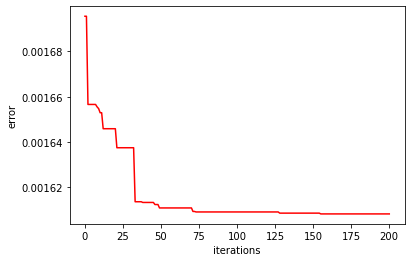

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(iterations,convergence_curve,color='red')
plt.xlabel('iterations')
plt.ylabel('error')